In [103]:
%matplotlib notebook
from matplotlib.pyplot import *
import numpy as np
from astropy.time import Time
import matplotlib as mpl
from pytz import timezone
import pytz
mpl.rcParams['timezone'] = 'US/Arizona'
now = datetime.datetime.now(timezone('US/Arizona'))
utcoffset = now.utcoffset().total_seconds()/60/60


In [29]:
def load_ECHO_spectrum(filename):
    mean_spectra = []
    times = []
    for line in open(filename).readlines():
        if line.startswith('# freqs'):
            freqs = line.split(':')[1]
            freqs = np.array(freqs.split(',')).astype(float)
        if line.startswith('MEAN'):
            datya = np.array(line[5:].split(',')).astype(float)
            t = datya[0]
            spec = datya[1:]
            #check that the freqs match the data
            if len(spec)!=len(freqs):continue
            mean_spectra.append(spec)
            times.append(t)
    return np.array(times).astype(float),freqs,np.vstack(mean_spectra)
def dB(x):
    return 10*np.log10(x)

In [60]:
times,freqs,mean_specs = load_ECHO_spectrum('ECHO_dipole_2018-10-26T00_32_24.491.txt')

<IPython.core.display.Javascript object>


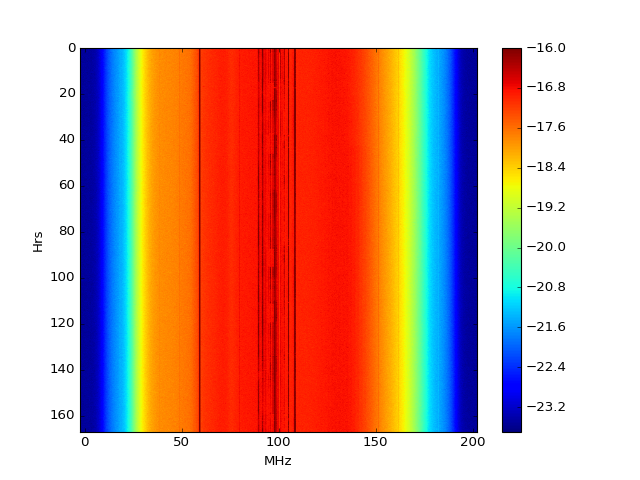

In [61]:
figure()
imshow(mean_specs,aspect='auto',extent=(freqs.min()/1e6,freqs.max()/1e6,24*(times.max()-times.min()),0),vmax=-16)
#imshow(mean_specs,aspect='auto',vmax=-16)
colorbar()
xlabel('MHz')
ylabel('Hrs')

<IPython.core.display.Javascript object>


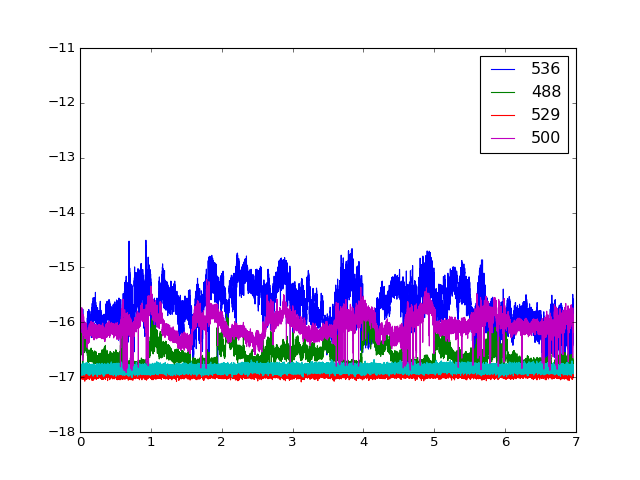

In [109]:
figure()
plot(times-times.min(),mean_specs[:,536],label='536')
plot(times-times.min(),mean_specs[:,488],label='488')
plot(times-times.min(),mean_specs[:,529],label='529')
plot(times-times.min(),mean_specs[:,456])
plot(times-times.min(),mean_specs[:,500],label='500')
legend()

<IPython.core.display.Javascript object>


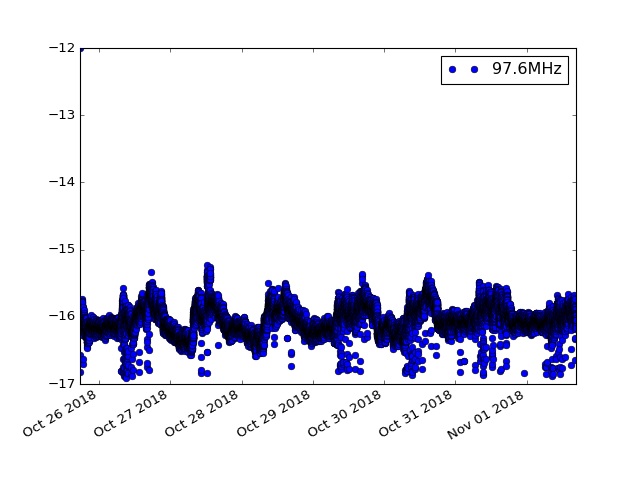

In [111]:
fig = figure()
t = Time(times,scale='utc',format='jd')
plot_date(t.plot_date,mean_specs[:,500],label=str(freqs[500]/1e6)+'MHz')
fig.autofmt_xdate(bottom=0.2, rotation=30, ha='right')
legend()

In [ ]:
fig2 = figure()
hours = []
for atime in t:
    dtime = atime.datetime
    hours.append(dtime.hour + dtime.minute/60. + dtime.second/3600. + utcoffset)
#print(hours[-1])
plot(hours,mean_specs[:,500],'.',label=str(freqs[500]/1e6)+'MHz')
plot(hours,mean_specs[:,529],'.',label=str(freqs[529]/1e6)+'MHz')
xlabel('local time [hrs]')
legend()

<IPython.core.display.Javascript object>